# Project 2 : Model Training with Over Sampling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, plot_roc_curve

pd.set_option('display.max_columns', None)

In [3]:
# read master data
df = pd.read_excel(r'D:\data_programming_project\muskan\master1.xlsx')
df.head()

,id,entity_type,entity_id,category_code,status,founded_at,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,name,object_id,first_name,last_name,affiliation_name,degree_type,graduated_at,Education_Level,Target,grad_time,State,Education
0,c:10009,Company,10009,advertising,operating,2008-01-08 00:00:00,NM,Santa Fe,Santa Fe,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,22-08-2008,22-08-2008,1,2,1,2,15128,15128,15128,21,21,15128,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,21900,Others,Others
1,c:1001,Company,1001,web,acquired,2007-01-10 00:00:00,CA,Mountain View,SF Bay,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,26-02-2008,26-02-2008,1,5000000,2008-01-05 00:00:00,13-09-2012,3,14,1,11,15433,15433,148,213,1809,148,FriendFeed,p:2716,Sanjeev,Singh,FriendFeed,BS,1999-01-01,Undergraduate,0,3195,CA,Undergraduate
2,c:10011,Company,10011,games_video,operating,2008-01-01 00:00:00,CA,Julian,San Diego,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,2008-01-01 00:00:00,2008-01-01 00:00:00,1,3,1,3,15341,15341,15341,0,0,15341,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,21900,CA,Others
3,c:10015,Company,10015,others,operating,2007-01-10 00:00:00,CA,San Francisco,SF Bay,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,2008-10-10 00:00:00,13-08-2013,5,68069200,2050-01-01 00:00:00,2050-01-01 00:00:00,0,14,1,14,15433,15433,375,15433,15433,2143,Fitbit,p:216979,Eric,Friedman,Fitbit,MS,NaT,Graduate,0,21900,CA,Graduate
4,c:100155,Company,100155,others,operating,2003-01-01 00:00:00,TX,Austin,Austin,2050-01-01 00:00:00,2050-01-01 00:00:00,0,0,2011-08-03 00:00:00,26-01-2012,3,10125293,2010-01-01 00:00:00,2010-01-01 00:00:00,1,6,1,6,17167,17167,2988,2557,2557,3312,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0,21900,Others,Others


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33866 entries, 0 to 33865
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       33866 non-null  object        
 1   entity_type              33866 non-null  object        
 2   entity_id                33866 non-null  int64         
 3   category_code            33866 non-null  object        
 4   status                   33866 non-null  object        
 5   founded_at               33866 non-null  object        
 6   state_code               33866 non-null  object        
 7   city                     33866 non-null  object        
 8   region                   33866 non-null  object        
 9   first_investment_at      33866 non-null  object        
 10  last_investment_at       33866 non-null  object        
 11  investment_rounds        33866 non-null  int64         
 12  invested_companies       33866 n

In [5]:
df['Target'].value_counts()

0    33012
1      854
Name: Target, dtype: int64

In [6]:
df['Target'].value_counts(normalize=True)

0    0.974783
1    0.025217
Name: Target, dtype: float64

# Categorical Features

In [7]:
cat = df.select_dtypes(include='object').columns
print("# categorical features: ", len(cat))

# categorical features:  23


In [8]:
cat

Index(['id', 'entity_type', 'category_code', 'status', 'founded_at',
       'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at', 'first_funding_at', 'last_funding_at',
       'first_milestone_at', 'last_milestone_at', 'name', 'object_id',
       'first_name', 'last_name', 'affiliation_name', 'degree_type',
       'Education_Level', 'State', 'Education'],
      dtype='object')

In [9]:
# removing columns that are already used for engineering features
# removing id
# removing status as target is created based on status
drop_col = ['id', 
            'status',
            'founded_at', 
            'first_investment_at', 'last_investment_at',
            'first_funding_at', 'last_funding_at', 
            'first_milestone_at', 'last_milestone_at',
            'Education_Level'
           ]

drop_id_columns = ['name', 'object_id', 'first_name', 'last_name', 'affiliation_name', 'degree_type']

entity_type


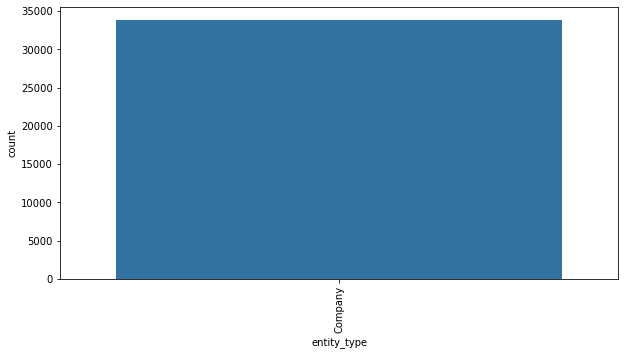

category_code


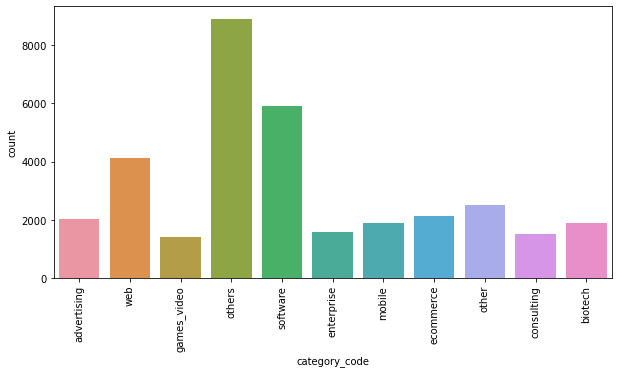

state_code


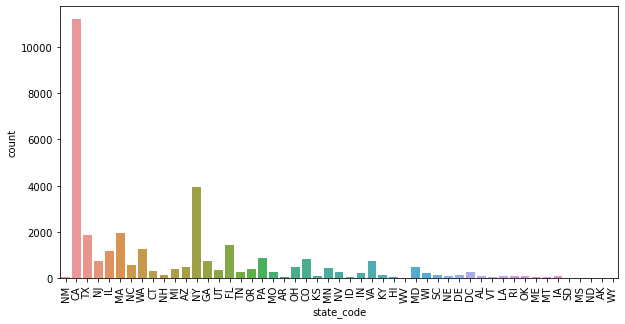

city


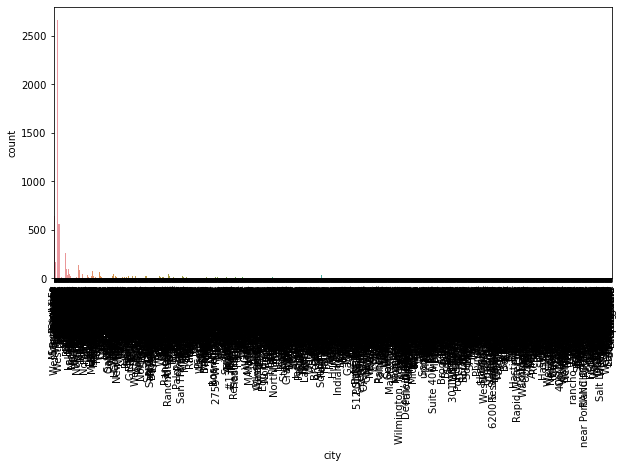

region


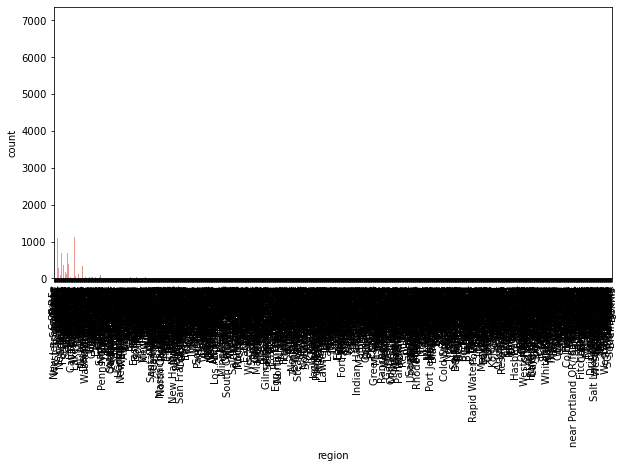

State


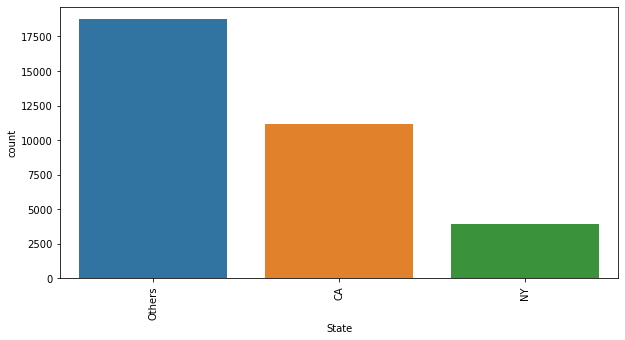

Education


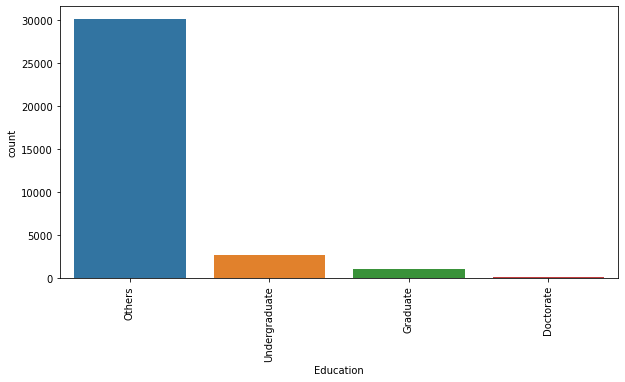

In [10]:
cat_select = df.select_dtypes(include='object').columns.drop(drop_col + drop_id_columns)

for i in cat_select:
    print(i)
    plt.figure(figsize = (10,5))
    plt.xticks(rotation=90)
    sns.countplot(data = df, x = i)
    plt.show()

In [11]:
# dropping
# entity_type as there is only one entry
# region and city as data is spread over all regions, no patterns are observed
cat_select1 = cat_select.drop(['entity_type', 'region', 'city', 'state_code'])

# Selected categorical columns
cat_select1

Index(['category_code', 'State', 'Education'], dtype='object')

# Numerical Columns

In [12]:
num = df.select_dtypes(exclude='object').columns
print("# numerical features: ", len(num))

# numerical features:  18


In [13]:
num

Index(['entity_id', 'investment_rounds', 'invested_companies',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'region_count', 'person_count', 'age_at_first_investment',
       'age_at_last_investment', 'age_at_first_funding',
       'age_at_first_milestone', 'age_at_last_milestone',
       'age_at_last_funding', 'graduated_at', 'Target', 'grad_time'],
      dtype='object')

In [14]:
df[num].head()

,entity_id,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,graduated_at,Target,grad_time
0,10009,0,0,0,0,1,2,1,2,15128,15128,15128,21,21,15128,NaT,0,21900
1,1001,0,0,1,5000000,3,14,1,11,15433,15433,148,213,1809,148,1999-01-01,0,3195
2,10011,0,0,0,0,1,3,1,3,15341,15341,15341,0,0,15341,NaT,0,21900
3,10015,0,0,5,68069200,0,14,1,14,15433,15433,375,15433,15433,2143,NaT,0,21900
4,100155,0,0,3,10125293,1,6,1,6,17167,17167,2988,2557,2557,3312,NaT,0,21900


In [15]:
# dropping id
num1 = num.drop(['entity_id', 'graduated_at'])
num1

Index(['investment_rounds', 'invested_companies', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'region_count',
       'person_count', 'age_at_first_investment', 'age_at_last_investment',
       'age_at_first_funding', 'age_at_first_milestone',
       'age_at_last_milestone', 'age_at_last_funding', 'Target', 'grad_time'],
      dtype='object')

In [16]:
# Checking correlation with target
df[num1].corr()

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,Target,grad_time
investment_rounds,1.000000,0.998645,0.008349,0.009231,0.050757,0.120171,-0.000801,0.121689,-0.067663,-0.055994,0.000178,-0.005638,-0.003665,0.000619,-0.003377,-0.038982
invested_companies,0.998645,1.000000,0.008174,0.008126,0.048113,0.109372,-0.000932,0.110774,-0.066070,-0.055091,-0.000267,-0.005882,-0.004025,0.000145,-0.003232,-0.038432
funding_rounds,0.008349,0.008174,1.000000,0.321269,0.330501,0.164309,0.032797,0.158714,-0.061749,-0.062111,-0.659554,-0.169129,-0.160747,-0.626799,0.064360,-0.127925
funding_total_usd,0.009231,0.008126,0.321269,1.000000,0.144767,0.145782,0.027600,0.145359,0.010004,0.011993,-0.140875,-0.044899,-0.039605,-0.126528,0.001694,-0.045220
milestones,0.050757,0.048113,0.330501,0.144767,1.000000,0.293401,0.100937,0.287089,-0.079662,-0.076150,-0.216751,-0.690434,-0.664469,-0.203837,0.020019,-0.299181
relationships,0.120171,0.109372,0.164309,0.145782,0.293401,1.000000,0.061332,0.997532,-0.008805,0.011539,-0.043046,-0.079555,-0.070292,-0.034215,-0.011548,-0.174605
region_count,-0.000801,-0.000932,0.032797,0.027600,0.100937,0.061332,1.000000,0.061199,0.033102,0.033695,0.021376,-0.047372,-0.043446,0.025016,-0.021000,-0.053996
person_count,0.121689,0.110774,0.158714,0.145359,0.287089,0.997532,0.061199,1.000000,-0.008193,0.012146,-0.037003,-0.069633,-0.060332,-0.028292,-0.011839,-0.174082
age_at_first_investment,-0.067663,-0.066070,-0.061749,0.010004,-0.079662,-0.008805,0.033102,-0.008193,1.000000,0.999362,0.493700,0.456844,0.466164,0.504600,-0.027816,0.038735
age_at_last_investment,-0.055994,-0.055091,-0.062111,0.011993,-0.076150,0.011539,0.033695,0.012146,0.999362,1.000000,0.497150,0.458931,0.468419,0.508128,-0.028183,0.036237


In [17]:
df[num1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33866 entries, 0 to 33865
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   investment_rounds        33866 non-null  int64
 1   invested_companies       33866 non-null  int64
 2   funding_rounds           33866 non-null  int64
 3   funding_total_usd        33866 non-null  int64
 4   milestones               33866 non-null  int64
 5   relationships            33866 non-null  int64
 6   region_count             33866 non-null  int64
 7   person_count             33866 non-null  int64
 8   age_at_first_investment  33866 non-null  int64
 9   age_at_last_investment   33866 non-null  int64
 10  age_at_first_funding     33866 non-null  int64
 11  age_at_first_milestone   33866 non-null  int64
 12  age_at_last_milestone    33866 non-null  int64
 13  age_at_last_funding      33866 non-null  int64
 14  Target                   33866 non-null  int64
 15  gr

<AxesSubplot:>

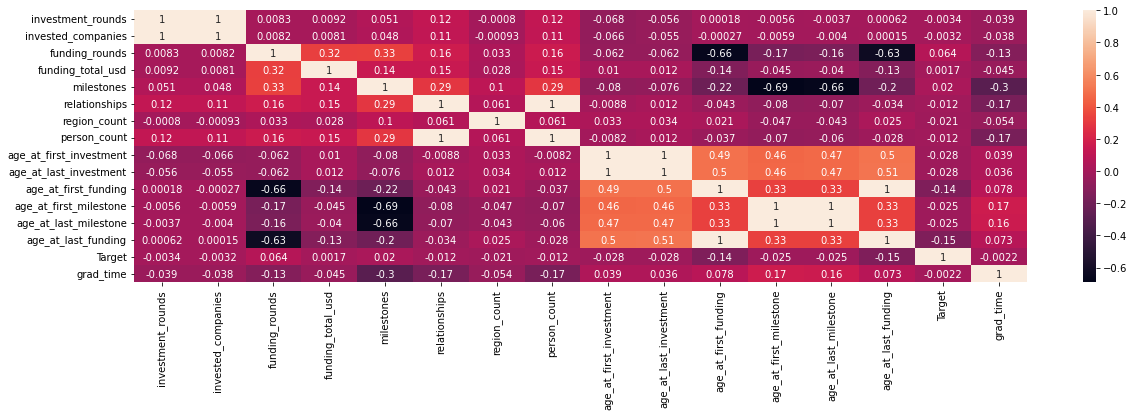

In [18]:
plt.figure(figsize=(20,5))
sns.heatmap(data = df[num1].corr(), annot = True)

In [19]:
# Not dropping anything because of less features and developing base model using entire data

# Train Test Split

In [20]:
df_master = df[list(cat_select1) + list(num1)].copy()
df_master.head()

,category_code,State,Education,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,Target,grad_time
0,advertising,Others,Others,0,0,0,0,1,2,1,2,15128,15128,15128,21,21,15128,0,21900
1,web,CA,Undergraduate,0,0,1,5000000,3,14,1,11,15433,15433,148,213,1809,148,0,3195
2,games_video,CA,Others,0,0,0,0,1,3,1,3,15341,15341,15341,0,0,15341,0,21900
3,others,CA,Graduate,0,0,5,68069200,0,14,1,14,15433,15433,375,15433,15433,2143,0,21900
4,others,Others,Others,0,0,3,10125293,1,6,1,6,17167,17167,2988,2557,2557,3312,0,21900


In [21]:
X = df_master.drop(columns = 'Target')
y = df_master['Target']

print(X.shape, y.shape)

(33866, 18) (33866,)


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
X_train.shape, X_test.shape

((27092, 18), (6774, 18))

# Encoding Categorical Features

In [244]:
X_train.head()

,category_code,State,Education,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,grad_time
19073,software,Others,Others,0,0,0,0,1,1,1,1,14033,14033,14033,0,0,14033,21900
9668,games_video,NY,Others,0,0,6,69000000,2,10,1,10,17260,17260,1220,3897,4067,3452,21900
22204,others,Others,Others,0,0,4,18500000,1,6,1,6,15341,15341,692,1247,1247,2017,21900
24862,mobile,CA,Others,0,0,1,0,2,2,1,2,14975,14975,334,0,622,334,21900
28100,ecommerce,Others,Others,0,0,1,250000,1,2,1,2,14490,14490,0,0,0,0,21900


In [245]:
encoder = ce.OneHotEncoder(cols = ['category_code', 'State', 'Education'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [246]:
X_train.head()

,category_code_1,category_code_2,category_code_3,category_code_4,category_code_5,category_code_6,category_code_7,category_code_8,category_code_9,category_code_10,category_code_11,State_1,State_2,State_3,Education_1,Education_2,Education_3,Education_4,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,grad_time
19073,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,14033,14033,14033,0,0,14033,21900
9668,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6,69000000,2,10,1,10,17260,17260,1220,3897,4067,3452,21900
22204,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,18500000,1,6,1,6,15341,15341,692,1247,1247,2017,21900
24862,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,2,2,1,2,14975,14975,334,0,622,334,21900
28100,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,250000,1,2,1,2,14490,14490,0,0,0,0,21900


In [247]:
X_test.head()

,category_code_1,category_code_2,category_code_3,category_code_4,category_code_5,category_code_6,category_code_7,category_code_8,category_code_9,category_code_10,category_code_11,State_1,State_2,State_3,Education_1,Education_2,Education_3,Education_4,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,region_count,person_count,age_at_first_investment,age_at_last_investment,age_at_first_funding,age_at_first_milestone,age_at_last_milestone,age_at_last_funding,grad_time
14231,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,8000000,1,2,1,2,14245,14245,1018,365,365,1018,21900
13403,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,18529,18529,18529,18529,18529,18529,21900
5098,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,4,23225000,1,6,1,6,14610,14610,654,730,730,1432,21900
24601,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,45500000,1,5,1,5,15706,15706,1176,1096,1096,1808,21900
13461,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,26416000,1,0,1,1,14248,14248,642,1063,1063,937,21900


# Train Model

# Decision Tree

In [312]:
dt = DecisionTreeClassifier(max_depth=30, random_state=1234)

# dt.fit(X_train_smote, y_train_smote)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1234)

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


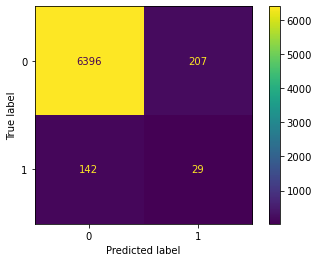

In [313]:
plot_confusion_matrix(dt, X_test, y_test)  

In [314]:
y_pred_test = dt.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6603
           1       0.12      0.17      0.14       171

    accuracy                           0.95      6774
   macro avg       0.55      0.57      0.56      6774
weighted avg       0.96      0.95      0.95      6774



# Random Forest

In [261]:
clf = RandomForestClassifier(random_state=1234)

# fit on train data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1234)

In [262]:
# Check feature importance
clf.feature_importances_

array([0.01179235, 0.01005097, 0.01497949, 0.00728698, 0.00713713,
       0.00599314, 0.0132322 , 0.00435822, 0.00622841, 0.00431789,
       0.00213672, 0.01486604, 0.00956883, 0.01444012, 0.00699093,
       0.00583119, 0.00347691, 0.00232394, 0.00044111, 0.00029745,
       0.0299993 , 0.09398555, 0.02300076, 0.05678584, 0.00768515,
       0.04474269, 0.08388708, 0.0832496 , 0.1179384 , 0.08347328,
       0.08512499, 0.12897636, 0.01540099])

In [263]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6603
           1       0.27      0.02      0.03       171

    accuracy                           0.97      6774
   macro avg       0.62      0.51      0.51      6774
weighted avg       0.96      0.97      0.96      6774



### Evaluating Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


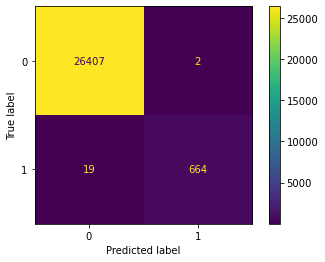

In [264]:
plot_confusion_matrix(clf, X_train, y_train)  

In [265]:
roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])

0.9998798881010605

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


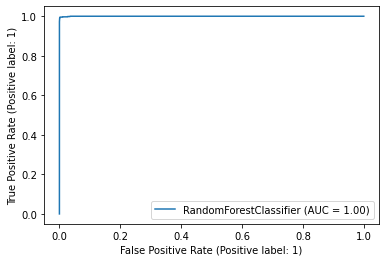

In [266]:
plot_roc_curve(clf, X_train, y_train)

In [267]:
y_pred_train = clf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26409
           1       1.00      0.97      0.98       683

    accuracy                           1.00     27092
   macro avg       1.00      0.99      0.99     27092
weighted avg       1.00      1.00      1.00     27092



### Evaluating Test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


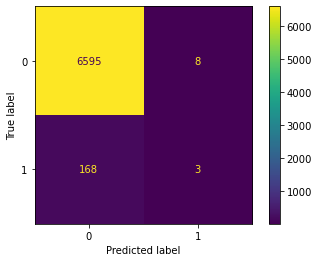

In [268]:
plot_confusion_matrix(clf, X_test, y_test)  

In [269]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.823988830170231

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


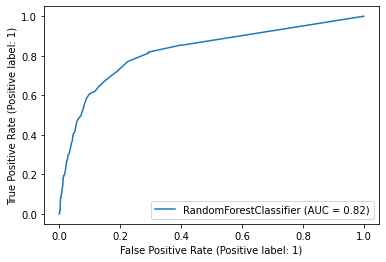

In [270]:
plot_roc_curve(clf, X_test, y_test)

In [271]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6603
           1       0.27      0.02      0.03       171

    accuracy                           0.97      6774
   macro avg       0.62      0.51      0.51      6774
weighted avg       0.96      0.97      0.96      6774



# SVM

### Model not suitable

In [281]:
clf2 = SVC(random_state=1234, probability = True)

# fit on train data
clf2.fit(X_train, y_train)

SVC(probability=True, random_state=1234)

### Evaluating Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


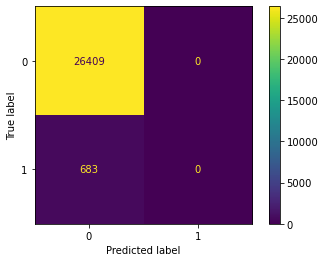

In [282]:
plot_confusion_matrix(clf2, X_train, y_train)  

In [283]:
roc_auc_score(y_train, clf2.predict_proba(X_train)[:,1])

0.5448430414960692

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


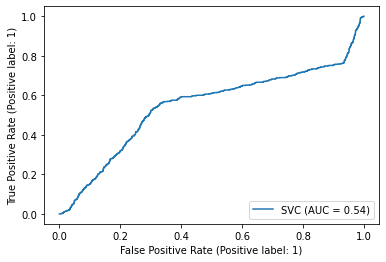

In [284]:
plot_roc_curve(clf2, X_train, y_train)

In [285]:
y_pred_train2 = clf2.predict(X_train)
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     26409
           1       0.00      0.00      0.00       683

    accuracy                           0.97     27092
   macro avg       0.49      0.50      0.49     27092
weighted avg       0.95      0.97      0.96     27092



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating Test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


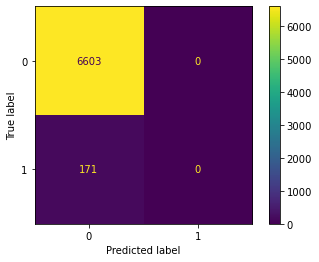

In [286]:
plot_confusion_matrix(clf2, X_test, y_test)  

In [287]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])

0.5535517702833994

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


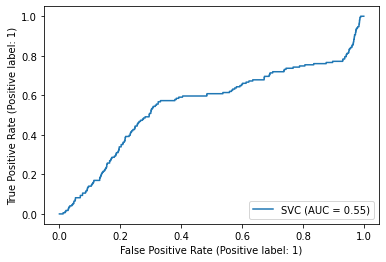

In [288]:
plot_roc_curve(clf2, X_test, y_test)

In [289]:
y_pred_test2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6603
           1       0.00      0.00      0.00       171

    accuracy                           0.97      6774
   macro avg       0.49      0.50      0.49      6774
weighted avg       0.95      0.97      0.96      6774



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Over Sampling

### minority to majority class ratio to 0.2

In [290]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [291]:
sm = SMOTE(sampling_strategy=0.3, random_state=1234)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [292]:
len(X_train), len(y_train), len(X_train_smote), len(y_train_smote)

(27092, 27092, 34331, 34331)

# Train Model

# Random Forest

In [318]:
clf = RandomForestClassifier(n_estimators=500, 
                             random_state=1234,
                             max_depth = 3,
                             #min_samples_leaf=50
                            )

# fit on train data
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=1234)

In [317]:
# Check feature importance
clf.feature_importances_

array([2.73308081e-02, 5.43229496e-06, 4.70328679e-02, 2.83852047e-03,
       2.81924205e-04, 3.28787971e-03, 2.35880539e-05, 5.92477404e-03,
       5.34595545e-03, 2.51481007e-03, 3.52579791e-04, 8.18869968e-02,
       1.29622624e-02, 2.01602608e-02, 2.84827395e-03, 3.34208933e-03,
       7.04371321e-04, 4.02213151e-07, 1.78559363e-06, 8.10504611e-08,
       1.37818290e-01, 9.68805754e-02, 3.23496761e-03, 1.94406449e-02,
       6.72442851e-03, 1.86967918e-02, 5.32956058e-02, 5.64628825e-02,
       1.69346427e-01, 7.25372237e-03, 1.11935678e-02, 2.01334708e-01,
       1.47172526e-03])

### Evaluating Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


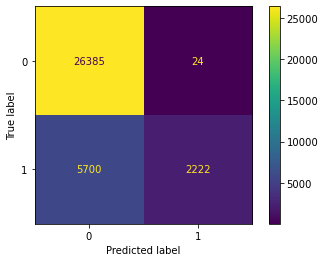

In [315]:
plot_confusion_matrix(clf, X_train_smote, y_train_smote)  

In [297]:
roc_auc_score(y_train_smote, clf.predict_proba(X_train_smote)[:,1])

0.895580868846313

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


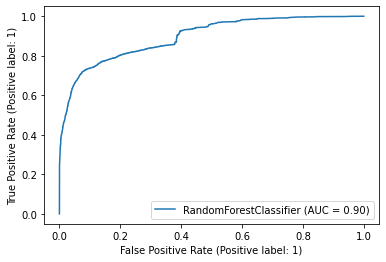

In [298]:
plot_roc_curve(clf, X_train_smote, y_train_smote)

In [299]:
y_pred_train_smote = clf.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     26409
           1       0.98      0.29      0.44      7922

    accuracy                           0.83     34331
   macro avg       0.90      0.64      0.67     34331
weighted avg       0.86      0.83      0.80     34331



### Evaluating Test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


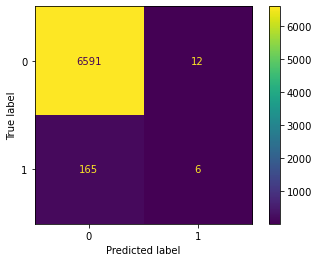

In [319]:
plot_confusion_matrix(clf, X_test, y_test)  

In [320]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.8198045722615894

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


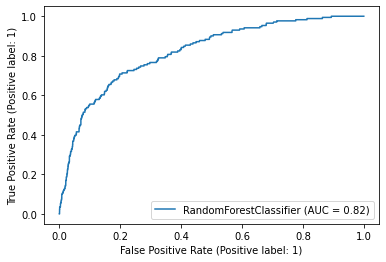

In [321]:
plot_roc_curve(clf, X_test, y_test)

In [322]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6603
           1       0.33      0.04      0.06       171

    accuracy                           0.97      6774
   macro avg       0.65      0.52      0.53      6774
weighted avg       0.96      0.97      0.96      6774



# SVM

In [59]:
clf2 = SVC(random_state=1234, probability = True)

# fit on train data
clf2.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=1234)

### Evaluating Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


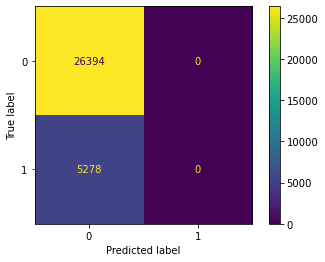

In [60]:
plot_confusion_matrix(clf2, X_train_smote, y_train_smote)  

In [61]:
roc_auc_score(y_train_smote, clf2.predict_proba(X_train_smote)[:,1])

0.2894239487352342

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


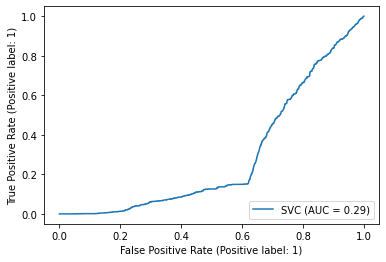

In [62]:
plot_roc_curve(clf2, X_train_smote, y_train_smote)

In [63]:
y_pred_train2_smote = clf2.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train2_smote))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     26394
           1       0.00      0.00      0.00      5278

    accuracy                           0.83     31672
   macro avg       0.42      0.50      0.45     31672
weighted avg       0.69      0.83      0.76     31672



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating Test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


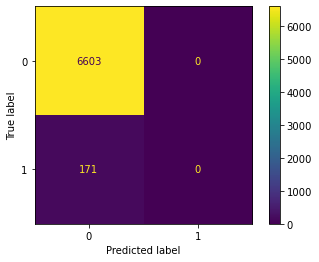

In [323]:
plot_confusion_matrix(clf2, X_test, y_test)  

In [324]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])

0.5535517702833994

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


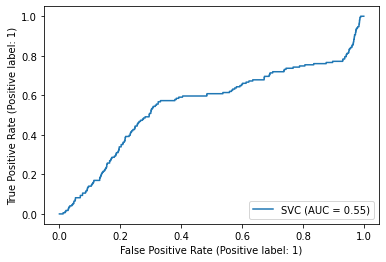

In [325]:
plot_roc_curve(clf2, X_test, y_test)

In [326]:
y_pred_test2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6603
           1       0.00      0.00      0.00       171

    accuracy                           0.97      6774
   macro avg       0.49      0.50      0.49      6774
weighted avg       0.95      0.97      0.96      6774



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adaboost Classifier



In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [330]:
SEED=1

# Instantiate a classification-tree 'dt'
dt1 = DecisionTreeClassifier(max_depth=30, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
clf3 = AdaBoostClassifier(base_estimator=dt1, n_estimators=500)
# Fit 'clf3' to the training set
clf3.fit(X_train_smote, y_train_smote)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                         random_state=1),
                   n_estimators=500)

### Evaluating train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


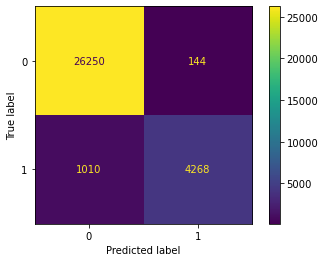

In [70]:
plot_confusion_matrix(clf3, X_train_smote, y_train_smote)  

In [71]:
roc_auc_score(y_train_smote, clf3.predict_proba(X_train_smote)[:,1])

0.9749290332700746

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


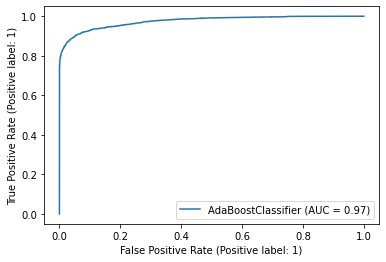

In [72]:
plot_roc_curve(clf3, X_train_smote, y_train_smote)

In [73]:
y_pred_train3_smote = clf3.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train3_smote))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26394
           1       0.97      0.81      0.88      5278

    accuracy                           0.96     31672
   macro avg       0.97      0.90      0.93     31672
weighted avg       0.96      0.96      0.96     31672



### Evaluating test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


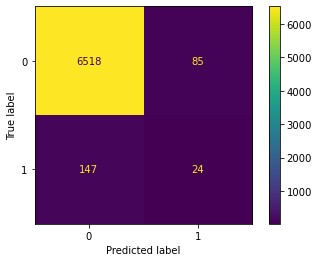

In [331]:
plot_confusion_matrix(clf3, X_test, y_test)

In [332]:
roc_auc_score(y_test, clf3.predict_proba(X_test)[:,1])

0.8191443194790955

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


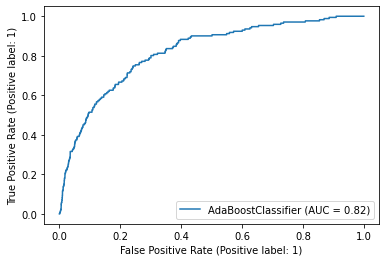

In [333]:
plot_roc_curve(clf3, X_test, y_test)

In [334]:
y_pred_test3 = clf3.predict(X_test)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6603
           1       0.22      0.14      0.17       171

    accuracy                           0.97      6774
   macro avg       0.60      0.56      0.58      6774
weighted avg       0.96      0.97      0.96      6774



# Gradient boost classifier

In [335]:
from sklearn.ensemble import GradientBoostingClassifier

In [351]:


clf4 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, #max_features=10, 
                                  max_depth=30, random_state=SEED)
# Fit 'clf3' to the training set
# clf4.fit(X_train_smote, y_train_smote)
clf4.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=30, n_estimators=500,
                           random_state=1)

### Evaluate Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


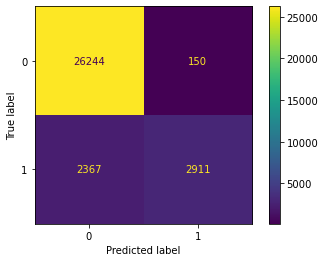

In [80]:
plot_confusion_matrix(clf4, X_train_smote, y_train_smote)

In [81]:
roc_auc_score(y_train_smote, clf4.predict_proba(X_train_smote)[:,1])

0.9420630357588992

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


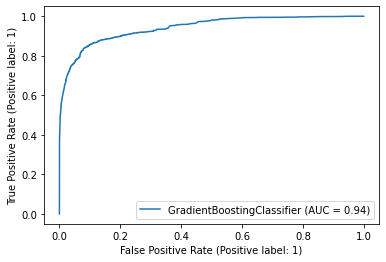

In [82]:
plot_roc_curve(clf4, X_train_smote, y_train_smote)

In [83]:
y_pred_train4_smote = clf4.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train4_smote))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     26394
           1       0.95      0.55      0.70      5278

    accuracy                           0.92     31672
   macro avg       0.93      0.77      0.83     31672
weighted avg       0.92      0.92      0.91     31672



### Evaluating test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


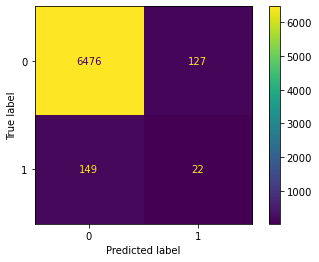

In [353]:
plot_confusion_matrix(clf4, X_test, y_test)

In [348]:
roc_auc_score(y_test, clf4.predict_proba(X_test)[:,1])

0.8163589472444299

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


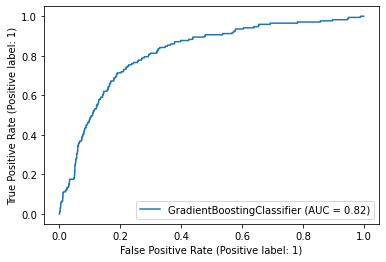

In [349]:
plot_roc_curve(clf4, X_test, y_test)

In [350]:
y_pred_test4 = clf4.predict(X_test)
print(classification_report(y_test, y_pred_test4))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6603
           1       0.12      0.13      0.12       171

    accuracy                           0.95      6774
   macro avg       0.55      0.55      0.55      6774
weighted avg       0.96      0.95      0.95      6774



# K Nearest Neighbors


In [391]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# peak at 180?
clf5 = KNN(n_neighbors=180,)

# Train the model using the training sets
clf5.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=180)

In [361]:
clf5.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

### Evaluating Train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


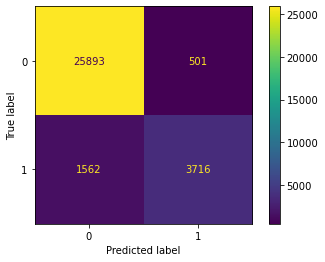

In [89]:
plot_confusion_matrix(clf5, X_train_smote, y_train_smote)  

In [90]:
roc_auc_score(y_train_smote, clf5.predict_proba(X_train_smote)[:,1])

0.9768852304410935

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


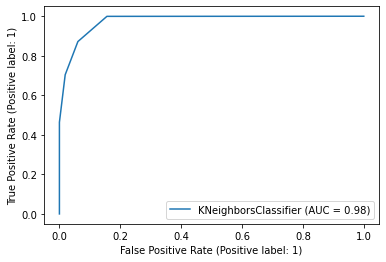

In [91]:
plot_roc_curve(clf5, X_train_smote, y_train_smote)

In [92]:
y_pred_train5_smote = clf5.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train5_smote))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26394
           1       0.88      0.70      0.78      5278

    accuracy                           0.93     31672
   macro avg       0.91      0.84      0.87     31672
weighted avg       0.93      0.93      0.93     31672



### Evaluating test


C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


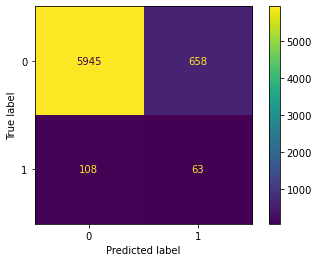

In [392]:
plot_confusion_matrix(clf5, X_test, y_test)

In [356]:
roc_auc_score(y_test, clf5.predict_proba(X_test)[:,1])

0.6644441256101027

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


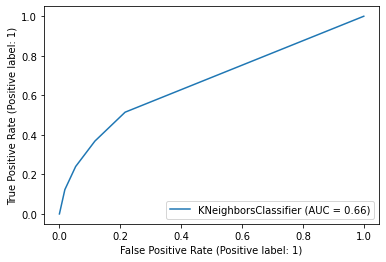

In [357]:
plot_roc_curve(clf5, X_test, y_test)

In [366]:
y_pred_test5 = clf5.predict(X_test)
print(classification_report(y_test, y_pred_test5))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      6603
           1       0.10      0.30      0.15       171

    accuracy                           0.92      6774
   macro avg       0.54      0.62      0.55      6774
weighted avg       0.96      0.92      0.94      6774



# Visualizing the total training and testing data

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
m = TSNE(learning_rate=1000)

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


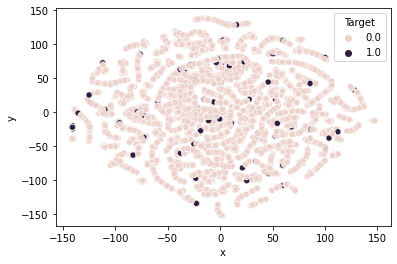

In [420]:
df_tsne = pd.DataFrame()
tsne_features = m.fit_transform(X_train)
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]
sns.scatterplot(x=df_tsne['x'], y=df_tsne['y'], hue=y_train)
plt.show()

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


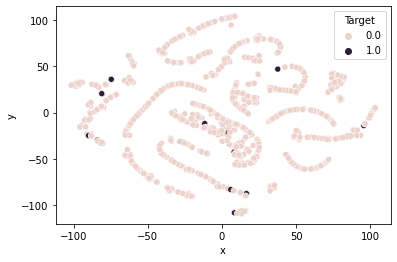

In [421]:
df_tsne = pd.DataFrame()
tsne_features = m.fit_transform(X_test)
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]
sns.scatterplot(x=df_tsne['x'], y=df_tsne['y'], hue=y_test)
plt.show()

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
clf6 = LogisticRegression()
clf6.fit(X_train_smote, y_train_smote)

LogisticRegression()

Evaluating train

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


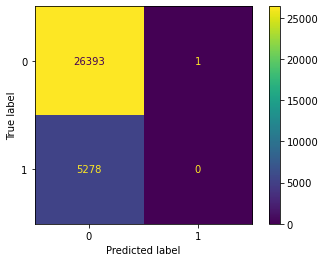

In [99]:
plot_confusion_matrix(clf6, X_train_smote, y_train_smote)  

In [100]:
roc_auc_score(y_train_smote, clf6.predict_proba(X_train_smote)[:,1])

0.7746771617488708

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


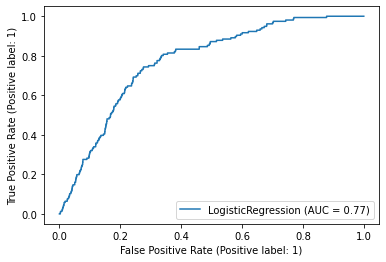

In [101]:
plot_roc_curve(clf6, X_test, y_test)

In [102]:
y_pred_train6_smote = clf6.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train6_smote))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     26394
           1       0.00      0.00      0.00      5278

    accuracy                           0.83     31672
   macro avg       0.42      0.50      0.45     31672
weighted avg       0.69      0.83      0.76     31672



Evaluating Test

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


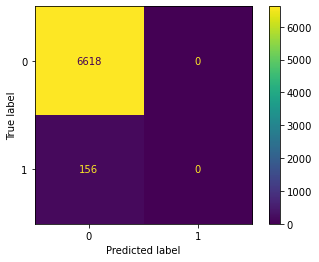

In [103]:
plot_confusion_matrix(clf6, X_test, y_test)

In [104]:
roc_auc_score(y_test, clf6.predict_proba(X_test)[:,1])

0.7719772609278501

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


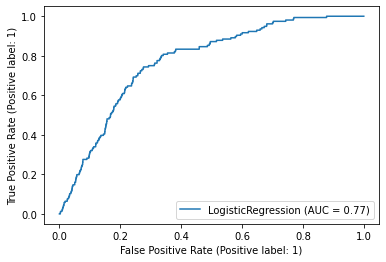

In [105]:
plot_roc_curve(clf6, X_test, y_test)

In [106]:
y_pred_test6 = clf6.predict(X_test)
print(classification_report(y_test, y_pred_test6))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6618
           1       0.00      0.00      0.00       156

    accuracy                           0.98      6774
   macro avg       0.49      0.50      0.49      6774
weighted avg       0.95      0.98      0.97      6774



C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
